In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('processed_data_for_ML.csv')  
df.head()

,Quantity,Discount,Profit,Shipping Cost,Month,Year,Day_of_Week,Is_Weekend,Total_sales,Day_of_Month,Order Priority_Encoded,Ship Mode_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded
0,7,0.0,762.1845,26.375915,7,2012,1,0,1205.327987,31,0,1,6,2,0
1,9,0.1,-288.7650,26.375915,2,2013,1,0,1205.327987,5,0,2,0,0,5
2,9,0.1,919.9710,26.375915,10,2013,3,0,1205.327987,17,3,0,0,2,13
3,5,0.1,-96.5400,26.375915,1,2013,0,0,1205.327987,28,3,0,4,2,13
4,8,0.0,311.5200,26.375915,11,2013,1,0,1205.327987,5,0,1,1,2,6


In [42]:
y = df['Quantity'] # Target variable
X = df.drop(columns=['Quantity'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [45]:
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
mae_test = mean_absolute_error(y_test, preds_test)
mae_train = mean_absolute_error(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)
r2_train = r2_score(y_train, preds_train)

print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
print(f"  Train R²:   {r2_train:.4f} | Test R²:   {r2_test:.4f}")

  Train RMSE: 1.0795 | Test RMSE: 1.1067
  Train MAE:  0.6900 | Test MAE:  0.7086
  Train R²:   0.7765 | Test R²:   0.7605


In [46]:
y_pred = model.predict(X_test)

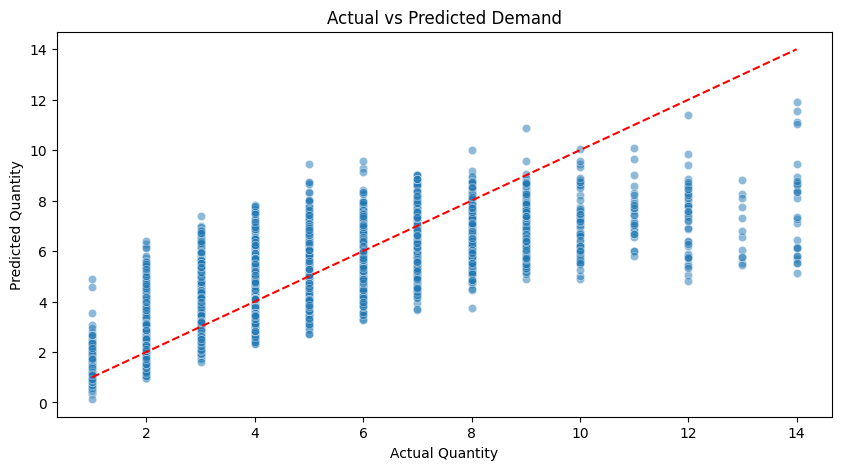

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Demand")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


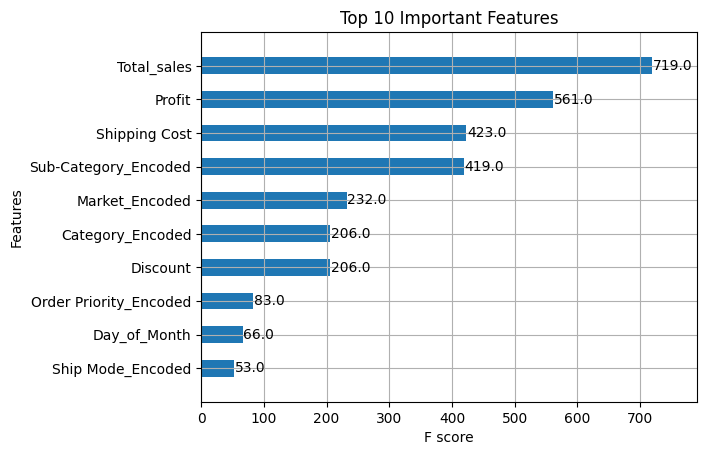

In [48]:
xgb.plot_importance(model, max_num_features=10, height=0.5)
plt.title("Top 10 Important Features")
plt.show()